# Rishabh Gupta

#  Task : Predicting using linear regression

In [1]:
#importing the modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
#importing data
data = pd.read_csv(r'C:\Users\Rishabh Gupta\Downloads\Scores.csv')

In [3]:
data.shape
# 25 data points of 2 variables : one feature variable and another target variable

(25, 2)

In [4]:
data.info()
# no null values with float and int data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
#peeking at the top part of the data
data.head(5)
#we have information about the scores and hours of each student

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
data.describe()
# details about each numerical variable

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#
The difference between min and 25 % is comparatively less for both variables. Similarly, the difference between 75% and max value is not much.
This shows that the absence of outliers in the given variables
# 
Mean > median (that is 50% value ), this means that they do not behave normally. Rather, they are rightly skewed for the same reason.

In [7]:
data.corr()['Hours']['Scores'] # correlation between hours and scores

0.9761906560220888

#
There is a positive and  very high correlation between hours and scores, it means that scores and hours move in a positive direction

Text(0.5, 1.0, 'Relationship ')

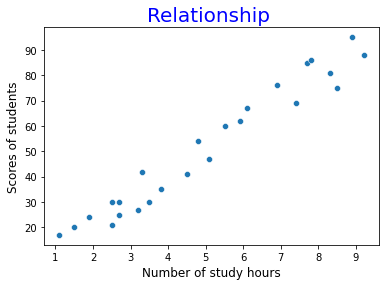

In [8]:
sns.scatterplot(x='Hours',y='Scores',data=data)
plt.xlabel('Number of study hours', fontsize= 12)
plt.ylabel("Scores of students",fontsize =12)
plt.title("Relationship ",fontsize =20,c='b')

#
It confirms the positive link between study hours and scores of students

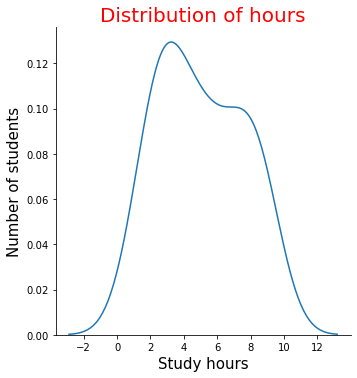

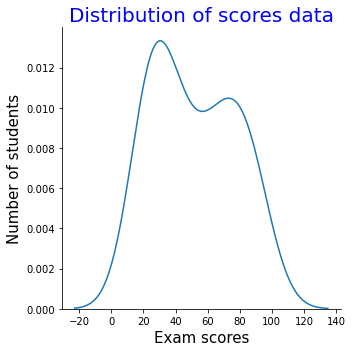

In [9]:
sns.displot(x='Hours',data=data,kind='kde')
plt.xlabel("Study hours",fontsize =15)
plt.ylabel("Number of students",fontsize =15)
plt.title("Distribution of hours",fontsize =20,color ='r')
#non-normal with right skewed
sns.displot(x='Scores',data=data,kind='kde')
plt.xlabel("Exam scores",fontsize =15)
plt.ylabel("Number of students",fontsize =15)
plt.title("Distribution of scores data",fontsize = 20,color ='b')
plt.tight_layout()

# 
Both study hours and exam score are rightly skewed which means most of the value are on the higher side ( that is
average is relatively high)

In [10]:
#taking x and y variables
x = np.array(data['Hours']).reshape(-1,1) # reshape is necessary as x variable is assumed to be multiply variable
y = np.array(data['Scores'])

In [11]:
#splitting into train and test data
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state= 0,test_size=0.2) #splitting with 20 percent test data

In [12]:
#estabilising model
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [13]:
#finding coefficients and intercepts
print (lr.coef_)
print(lr.intercept_)
#so the line would be y  = 2.0181 + 9.91x

[9.91065648]
2.018160041434683


In [14]:
#predicting for test data
y_pred = lr.predict(x_test)

In [15]:
# looking at the y_test and y_pred in the form of dataframe
y_test

array([20, 27, 69, 30, 62], dtype=int64)

In [16]:
#finding  the accuracy of the model using  square root of mean_squared_ratio
(mean_squared_error(y_test,y_pred))**0.5

4.6474476121003665

#Thus, on average, the predicted value of y differs from its actual value by 6.6 score

Text(0.5, 1.0, 'Visual relationship ')

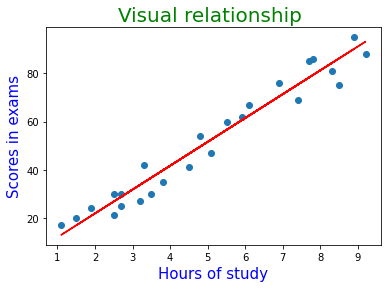

In [17]:
# Visualization
y_pred  =  2.0181 + 9.91*x
plt.plot(x,y_pred,color ='r')
plt.scatter(x,y)
plt.xlabel('Hours of study',fontsize=15,color ='b')
plt.ylabel('Scores in exams',fontsize=15,color ='b')
plt.title('Visual relationship ',fontsize=20,color='g')

In [18]:
#using the given model for predicting the result for student studying 9.25 hours per day
x_new = np.array(9.25).reshape(-1,1)
y_prednew = lr.predict(x_new)

In [19]:
y_prednew

array([93.69173249])

# Conclusion
According to this model, the student engaged in a study hours of 9.25 per day will get a score around 93.691 in the exams

# Thanks